<a href="https://colab.research.google.com/github/PayalSahu30/CardioVascular_Risk/blob/main/CardioVascular_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cardio/data_cardiovascular_risk.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# shape of dataset
df.shape

(3390, 17)

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# returns the number of unique values for each variable.
df.nunique(axis=0)

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [ ]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# let's See a Short information About data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Let us check for duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


No Duplicates Found

In [ ]:
# Let us check the majority and minority set of the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

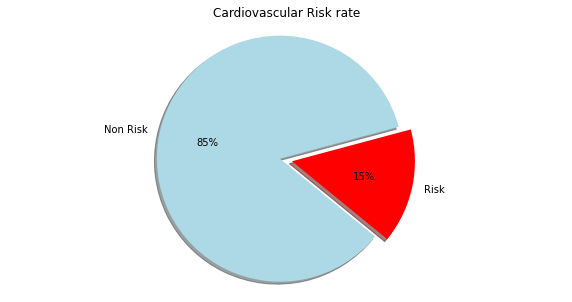

In [ ]:
# Let us plot the majority and minority set of the target variable
labels = 'Non Risk',"Risk"
my_colors = ['lightblue','red']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

85% people - No Risk - Majority Class

15% people - Risk - Minority Class 

#Data Cleaning

HANDLING NaN VALUES

In [ ]:
# Let us drop the ID column as it is unique and not of much use for this analysis.
df.drop('id',axis=1,inplace=True)

In [ ]:
# Let us check the new shape
df.shape

(3390, 16)

In [ ]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Identify the categorical and numerical columns to check the data distribution

column_datatypes= df.drop("TenYearCHD",axis=1).dtypes
categorical_columns=list(column_datatypes[column_datatypes=="object"].index.values)
continous_columns=list(column_datatypes[(column_datatypes=="int64") | (column_datatypes=="float64") ].index.values)


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [ ]:
class Data_preprocessing:
  def __init__(self,train_data):
        self.train_data = train_data

  def missing_value_continous(self,columns_with_specific_type,neighbors=3):
    knn_imputer= KNNImputer(n_neighbors=neighbors)

    knn_imputer.fit(self.train_data[columns_with_specific_type])
    self.train_data[columns_with_specific_type]= knn_imputer.transform(self.train_data[columns_with_specific_type])
    return self.train_data

  def missing_value_categorical(self,columns_with_specific_type,imputation_type="most_frequent"):
   most_frequent= SimpleImputer(strategy="most_frequent")
   most_frequent.fit(self.train_data[columns_with_specific_type])
   self.train_data[columns_with_specific_type]= most_frequent.transform(self.train_data[columns_with_specific_type])
   return self.train_data

In [ ]:
dlist= [df]
for ddf in dlist:
  #create class object
  dat= Data_preprocessing(ddf)
  ddf= dat.missing_value_continous(continous_columns)
  ddf= dat.missing_value_categorical(categorical_columns)

NaN values have now been filled

In [ ]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Outlier Treatment

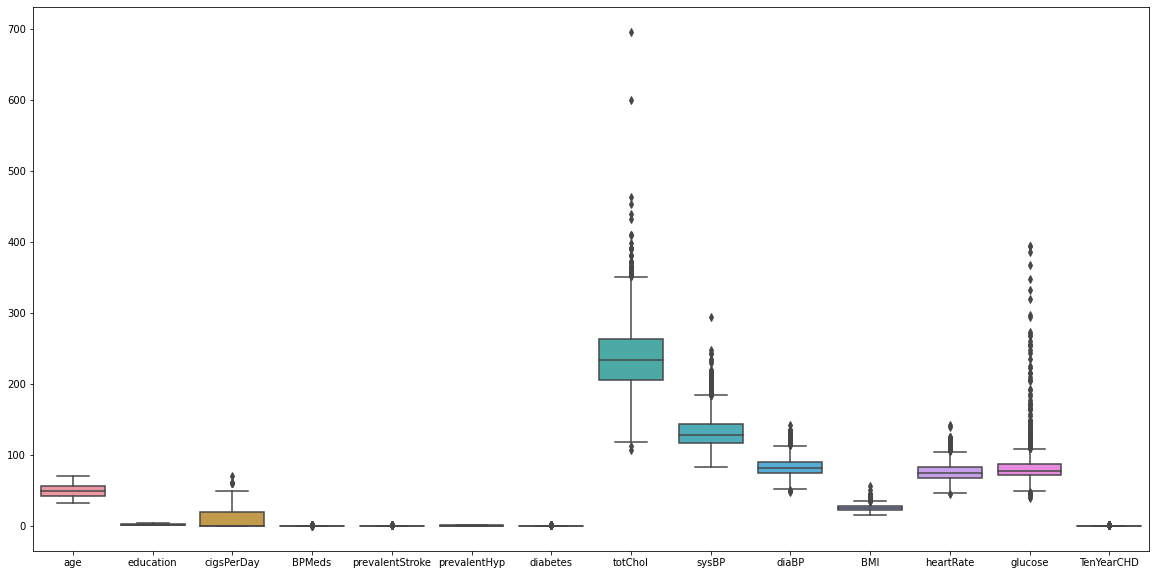

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

Outliers are important here and we simply cannot remove them because there could be a possibility that a person might have a high risk and removing it, would lead to ignorance of the same. This would further affect the machine learning model.

In [ ]:
print(df.totChol.min())
print(df.totChol.max())
print(df.totChol.mean())

107.0
696.0
237.07305801376597


We can clearly see higher value (i.e. 600) in the Totalchol in the box plot. This is now being replaced with average value for the ease of analysis purpose.

Lets see if theirs a good proportion between our positive & negative binary predictor.

In [ ]:
# We replaced 600 with 500 because we are focusing on people having risk of heart disease in future.
df['totChol'] = df['totChol'].replace(600.0,500.0)

In [ ]:
# Let us check
df.loc[420:425,:]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
420,40.0,2.0,F,YES,20.000000,0.0,0.0,0.0,0.0,165.0,101.0,59.0,23.06,60.0,76.0,0
421,50.0,1.0,F,NO,0.000000,0.0,0.0,0.0,0.0,281.0,107.5,74.0,23.44,85.0,79.0,0
422,55.0,1.0,F,YES,9.666667,0.0,0.0,1.0,0.0,213.0,163.0,91.0,28.66,69.0,66.0,0
423,52.0,2.0,F,NO,0.000000,0.0,0.0,1.0,1.0,500.0,159.5,94.0,28.27,78.0,140.0,1
424,48.0,2.0,F,NO,0.000000,0.0,0.0,0.0,0.0,237.0,124.5,66.5,33.29,80.0,91.0,0
425,43.0,4.0,M,YES,20.000000,0.0,0.0,0.0,0.0,187.0,129.5,88.0,25.62,80.0,75.0,0


Finally the data cleaning part is done with handling NaN values and outlier treatment.

#Feature Engineering

One Hot Encoding

Let us know focus on converting the categorical columns into numbers which can be read by the algorithms.

We have two features i.e.

sex - Male(M)/Female(F) which needs to be converted to 1 / 0

is_smoking - YES/NO which needs to be converted to 1 / 0

In [ ]:
# One Hot Encoding to the variables- SEX and IS_SMOKING:
# binary encoding
df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,30.913333,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0


Co-relation of features

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Let us divide the given columns into continous and discrete
continous_columns_list = ['age','cigsPerDay', 'totChol','sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
discrete_columns_list = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']


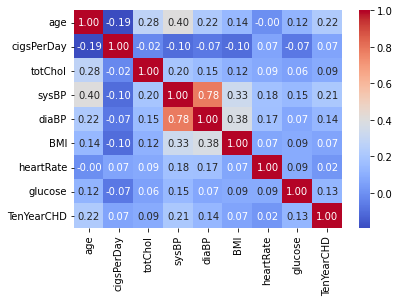

In [ ]:
cont_col = continous_columns_list.copy() 
#correlation matrix between numerical variables and RISK of getting heart disease
cont_col.append('TenYearCHD')
g= sns.heatmap(df[cont_col].corr(),annot=True,fmt='.2f',cmap='coolwarm')

sysBP & diaBP are co-related to each other. The co-relation is 0.78.

sysBP & TenYearCHD has a co-relation of 0.21.

diaBP & TenYearCHD has a co-relation of 0.14.

For a healthy human, the BP is 120/80.

Let us derive a new feature i.e. avgBP which would be defined by the below formula

avgBP = (sysBP + diaBP)/2

In [ ]:
df["avgBP"]= round((df["sysBP"]+df["diaBP"])/2,2)

In [ ]:
# Let us check the co-relation of avgBP and TenYearCHD
df["avgBP"].corr(df["TenYearCHD"])

0.1957935000660334

In [ ]:
# Since avgBP has been added, we can now remove sysBP & diaBP
df.drop("sysBP",axis=1,inplace=True)
df.drop("diaBP",axis=1,inplace=True)

In [ ]:
cont_col = ['age',
 'cigsPerDay',
 'totChol',
 'avgBP',
 'BMI',
 'heartRate',
 'glucose']

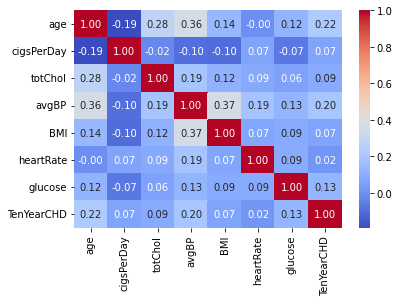

In [ ]:
#correlation matrix between numerical variables and RISK of getting heart disease
cont_col.extend(['TenYearCHD'])
g= sns.heatmap(df[cont_col].corr(),annot=True,fmt='.2f',cmap='coolwarm')

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
0,64.0,2.0,0,1,3.0,0.0,0.0,0.0,0.0,221.0,30.913333,90.0,80.0,1,116.50
1,36.0,4.0,1,0,0.0,0.0,0.0,1.0,0.0,212.0,29.770000,72.0,75.0,0,133.00
2,46.0,1.0,0,1,10.0,0.0,0.0,0.0,0.0,250.0,20.350000,88.0,94.0,0,93.50
3,50.0,1.0,1,1,20.0,0.0,0.0,1.0,0.0,233.0,28.260000,68.0,94.0,1,123.00
4,64.0,1.0,0,1,30.0,0.0,0.0,0.0,0.0,241.0,26.420000,70.0,77.0,0,110.75


#EDA - Feature Analysis

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'avgBP'],
      dtype='object')

In [ ]:
continous_columns_list = ['age','cigsPerDay', 'totChol','avgBP','BMI', 'heartRate', 'glucose']
discrete_columns_list = ['education','BPMeds','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']


EDA - Feature Analysis on Continuous Features

<Figure size 720x432 with 0 Axes>

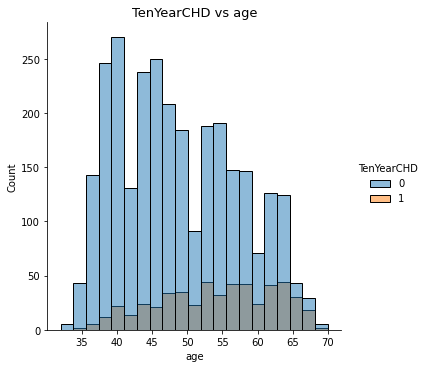

<Figure size 720x432 with 0 Axes>

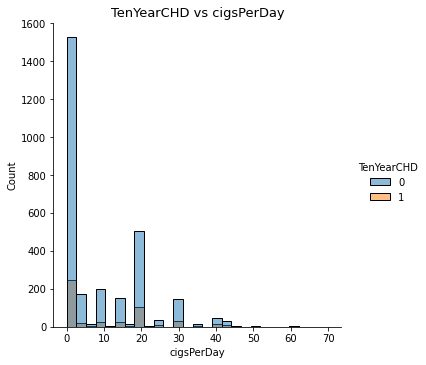

<Figure size 720x432 with 0 Axes>

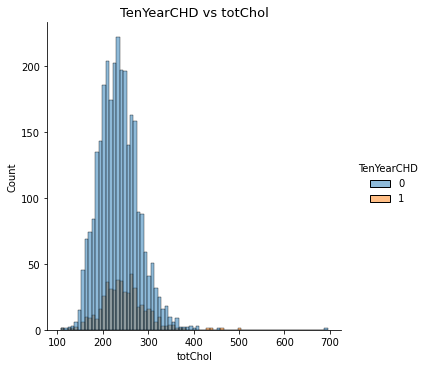

<Figure size 720x432 with 0 Axes>

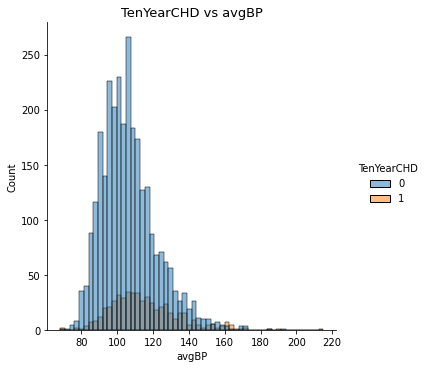

<Figure size 720x432 with 0 Axes>

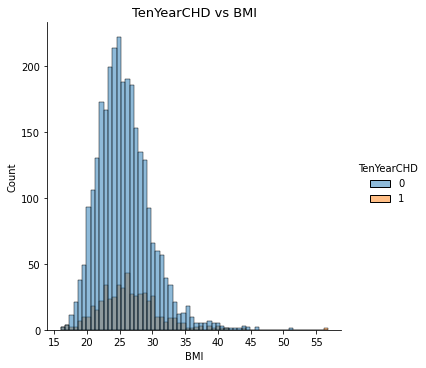

<Figure size 720x432 with 0 Axes>

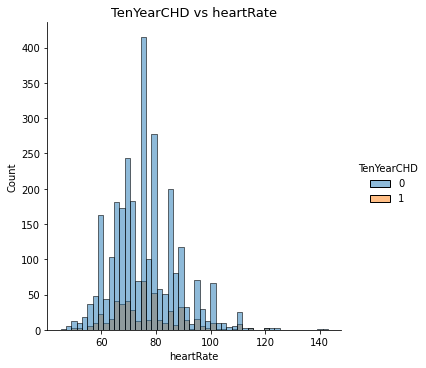

<Figure size 720x432 with 0 Axes>

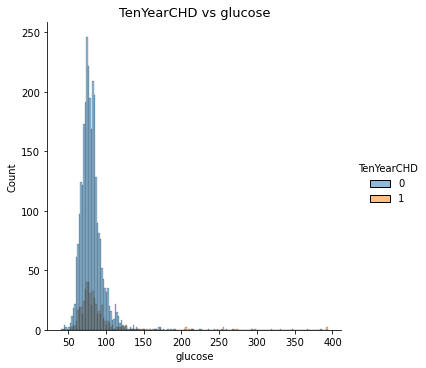

In [ ]:
for i, ii in enumerate(continous_columns_list):
  plt.figure(figsize = (10,6))
  #sns.distplot(data=df, y=ii, x=cat_cols[-1], kind='box')
  sns.displot(df, x=ii, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {ii}', fontsize=13)
  plt.show()

Inference:

1. Glucose slightly shows a bit of right skewness. But since we are concerned about people with cardiovascular issues we consider the right skewed values as an important information so we left it as it is.

2. cigsPerDay is not following Gaussian/Normal distribution and from the dist plot as well as the kde plot we did not get any inference w.r.t target variable.

**EDA - Feature Analysis on Discrete Features**

<Figure size 720x432 with 0 Axes>

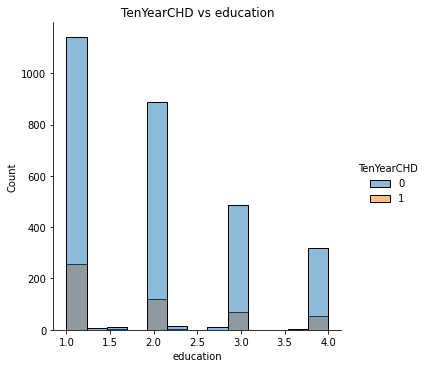

<Figure size 720x432 with 0 Axes>

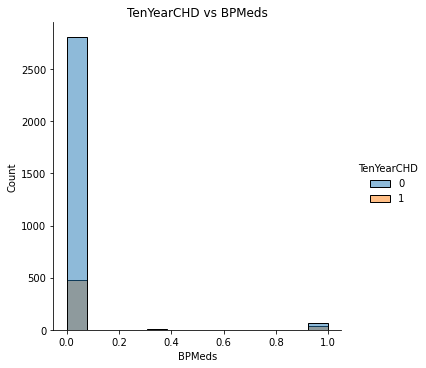

<Figure size 720x432 with 0 Axes>

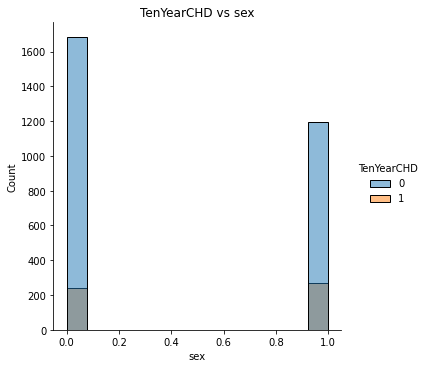

<Figure size 720x432 with 0 Axes>

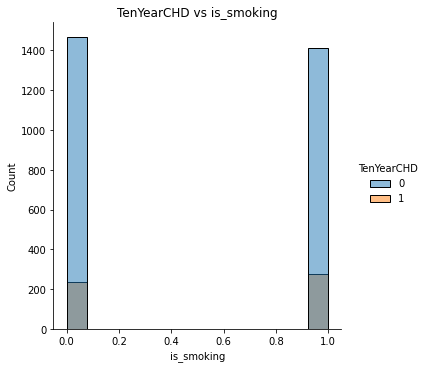

<Figure size 720x432 with 0 Axes>

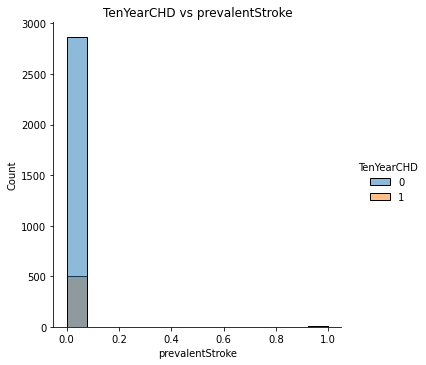

<Figure size 720x432 with 0 Axes>

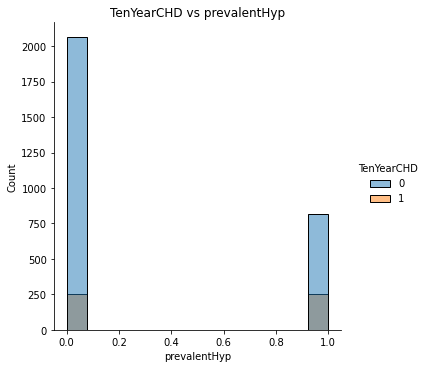

<Figure size 720x432 with 0 Axes>

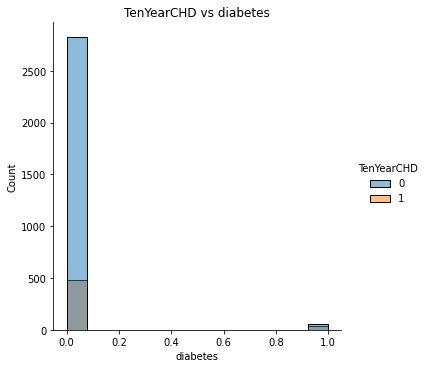

In [ ]:
# Dependent variable vs categorical features
for i, ii in enumerate(discrete_columns_list):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=ii, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {ii}')
  plt.show()

Inference:

1. Education is important, as it is evident that if people are aware, they take care and precautions in order to avoid the risk of CHD.

2. BPMeds, Prevalentstroke, diabetes have very low variance, thus we are unable to come up with any generalized conclusion about the co-relation between their history and prevalence of cardiovascular risk.

**Heat-Map**

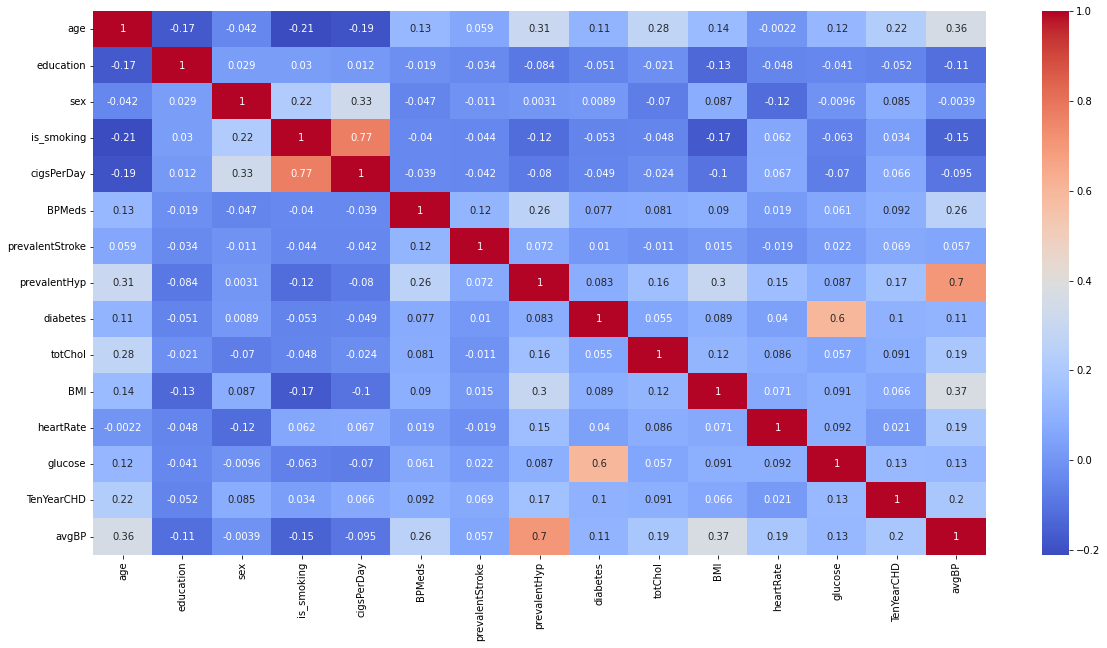

In [ ]:
#Bivariate Analysis: Corelation Matrix
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Inference:

It is evident from the above graph that the features having low variance i.e., BPMeds, Prevalentstroke, diabetes do not have any direct or good linear relationship with the target variable(TenYearCHD).

**EDA on Features

Age & Sex v/s Risk**

In [ ]:
df['sex'].unique()

array([0, 1])

Text(0.5, 1.0, 'Male')

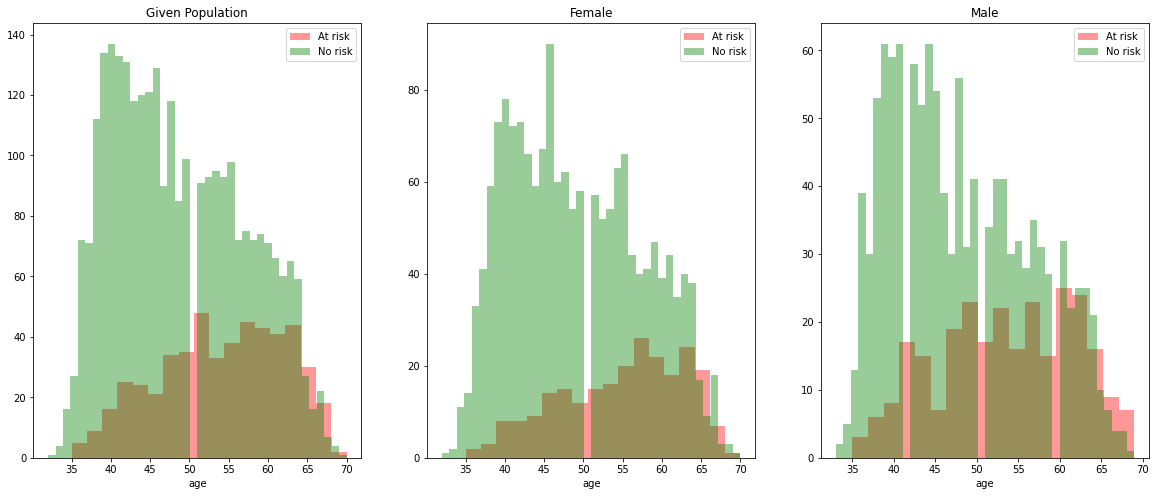

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g' ,kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='r',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='g',kde=False)
ax.legend()
ax.set_title("Male")

Inference:

We can infer the below from the above graphs:

1. Both women and men lying in Age group of 50 and above have high risk of heart disease.

2. Men above 45 years are usually at risk, where as women above 55 years are usually at risk.

3. Men are more likely to have heart disease compared to women.

**Age & Smoking v/s Risk**

Text(0.5, 1.0, 'NonSmokers')

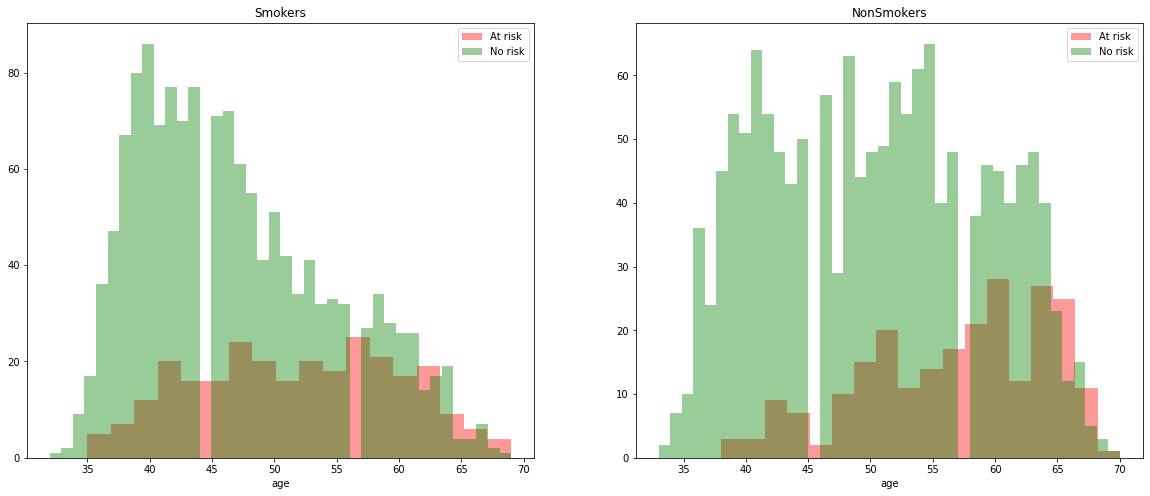

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
smoking= df[df['is_smoking']==1]
non_smoking= df[df['is_smoking']==0]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax= sns.distplot(smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("NonSmokers")

Inference:

Age clearly plays an important role irrespetive of smoking or not, which is clearly evident from the above two plots.

**CigsPerDay & Sex v/s Risk**

In [ ]:
df['is_smoking'].unique()

array([1, 0])

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].astype(int)

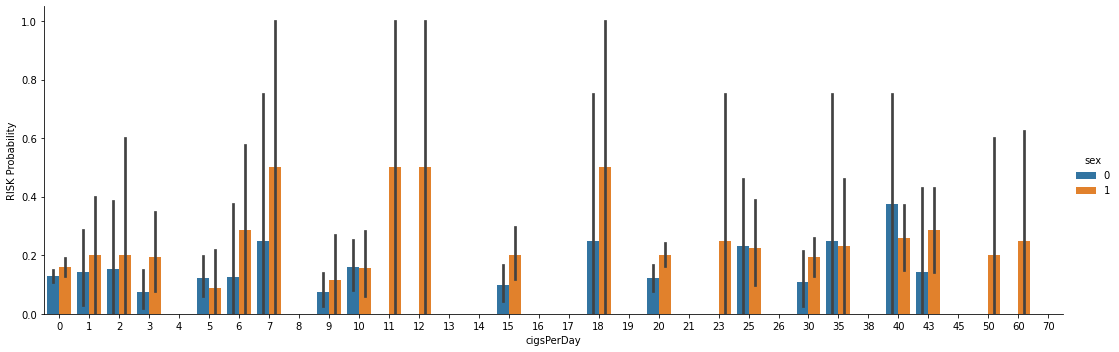

In [ ]:
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3)
g=g.set_ylabels("RISK Probability")

Inference:

1. It is very difficult to say, if consumption of less or no cigarettes mean lower risk levels.

2. Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers.

**Diabetes & Age v/s Risk**

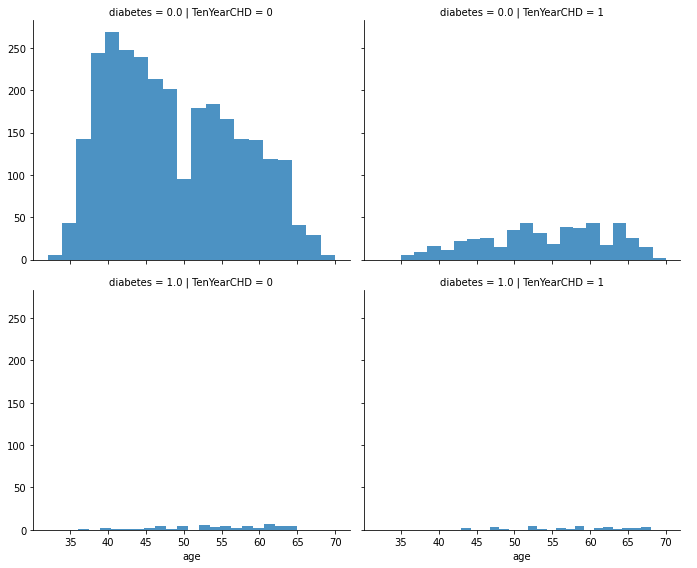

In [ ]:
grid= sns.FacetGrid(df,col='TenYearCHD',row='diabetes',size=4,aspect=1.2,palette='viridis')
grid.map(plt.hist,'age',alpha=.8,bins=20)
grid.add_legend();

Inference:

1. Non-Diabetic - Lesser risk of CHD.

2. Diabetic - Higher risk of CHD.

#Data Splitting, Training & Modelling

**Data Splitting**

In [ ]:
# Let us make a copy
new_crp = df.copy()

In [ ]:
new_crp.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
0,64.0,2.0,0,1,3,0.0,0.0,0.0,0.0,221.0,30.913333,90.0,80.0,1,116.50
1,36.0,4.0,1,0,0,0.0,0.0,1.0,0.0,212.0,29.770000,72.0,75.0,0,133.00
2,46.0,1.0,0,1,10,0.0,0.0,0.0,0.0,250.0,20.350000,88.0,94.0,0,93.50
3,50.0,1.0,1,1,20,0.0,0.0,1.0,0.0,233.0,28.260000,68.0,94.0,1,123.00
4,64.0,1.0,0,1,30,0.0,0.0,0.0,0.0,241.0,26.420000,70.0,77.0,0,110.75


In [ ]:
# Let us now split
X = new_crp.drop(['TenYearCHD'], axis=1)
y = new_crp['TenYearCHD']

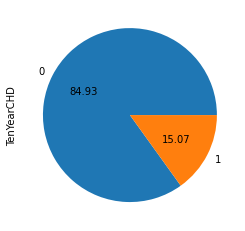

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

As per the above plot our target feature i.e., TenYearCHD, the risk rate is relatively rare, only 15% of the people have this disease.

Hence even if our model gives 94% accuracy! It is misleading.

All those non-risk cases, we’d have 100% accuracy. Those cases in which a person has a risk, we’d have 0% accuracy.

Hence our Evaluation Metrics for class imbalance problems (especiallly health data) would be RECALL, ROC SCORE.

**Handling Imbalance Data**

In [ ]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(new_crp))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [ ]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [ ]:
from collections import defaultdict

In [ ]:
y_resampled[0].value_counts()

KeyError: ignored

DATA is now balanced.

**Standardization**

In [ ]:
# Performing Standardization
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

In [ ]:
X = pd.DataFrame(X,columns= (new_crp.drop(['TenYearCHD'], axis=1).columns))

#Data Modelling & Training
We shall study the following training models#

1. Logistic Regression

2. K Nearest Neighbour

3. Decision Tree

4. Support Vector Machine

In [ ]:
# Importing all the essesntial Libraries.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.25,stratify = y_resampled, random_state=0)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions= lr.predict(X_test)

#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

In [ ]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

Hyper-Parameter tuning for Logistic Regression

In [ ]:
#Hyperparameter Tuning for Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2'] # By default its l1
c_values = [100, 10, 1.0, 0.1, 0.01] # less the c values 
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # 5*3*15 = 225
grid_search_lr = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_lr.fit(X_train, y_train)

In [ ]:
# summarize results - logistic regression
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
lr_predictions= grid_search_lr.predict(X_test)

#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier after hyperparameter tuning')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

In [ ]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

Inference:

There was not much difference before and after hyper-parameter tuning.

NOTE: We used both 5 and 10 splits and it was repeated 3 times. The result was still the same, especially recall and F1 score are were the same.

**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)
knn_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

Hyper-Parameter tuning for K-Nearest Neighbor

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score = False,verbose=1)
  

grid_search_knn.fit(X_train, y_train)

In [ ]:
# The Best Parameters
print('Best Parameters:', grid_search_knn.best_estimator_.get_params())

In [ ]:
knn_predictions= grid_search_knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)
knn_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

Inference:

Before Hyperparameter Tuning:

AUC score = 91%

Recall : 78%

F1 Score : 84%

After Hyperparameter Tuning:

AUC score = 89%

Recall : 84%

F1 Score : 89%

Hence though AUC got reduced, recall and F1score has increased.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
dTree= DecisionTreeClassifier()
dTree.fit(X_train,y_train)
dTree_predictions= dTree.predict(X_test)

#Performance Metrics
dTree_accuracy= accuracy_score(dTree_predictions,y_test)
dTree_precision= precision_score(dTree_predictions,y_test)
dTree_recall= recall_score(dTree_predictions,y_test)
dTree_f1_score= f1_score(dTree_predictions, y_test)

print('Performance of DecisionTreeClassifier')
print('Accuracy :' , dTree_accuracy)
print('Precision :', dTree_precision)
print('Recall :', dTree_recall)
print('F1 Score :', dTree_f1_score)

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(dTree,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

In [ ]:
graph = Source(tree.export_graphviz(dTree, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

**Hyper-Parameter tuning for Decision Tree**

In [ ]:
# Creating a dictionary of all the parameter options 
parameters = {'criterion': ['gini', 'entropy'],
                  'max_depth': range(1,10),
                 # 'min_samples_split': range(1,10),
              #'min_samples_leaf': range(1,5),
              #'random_state': '42'
              'max_features': range(1,11)
              }

# Creating a grid search object
grid_search_dTree = GridSearchCV(estimator=dTree, param_grid=parameters, n_jobs=-1, cv=10, verbose=3)

# Fitting the grid search
grid_search_dTree.fit(X_train, y_train)

In [ ]:
# Viewing The Best Parameters
print('Best Parameters:', grid_search_dTree.best_estimator_.get_params())

In [ ]:
dTree_predictions= grid_search_dTree.predict(X_test)

#Performance Metrics
dTree_accuracy= accuracy_score(dTree_predictions,y_test)
dTree_precision= precision_score(dTree_predictions,y_test, average='weighted')
dTree_recall= recall_score(dTree_predictions,y_test, average='weighted')
dTree_f1_score= f1_score(dTree_predictions, y_test, average='weighted')

print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , dTree_accuracy)
print('Precision :', dTree_precision)
print('Recall :', dTree_recall)
print('F1 Score :', dTree_f1_score)

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_dTree,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

Inference:

We can see an increase in the Recall, F1 Score, AUC_score after hyperparameter tuning

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train,y_train)
svm_predictions= svm.predict(X_test)

#Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test)
svm_recall= recall_score(svm_predictions,y_test)
svm_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

Hyper-Parameter Tuning for Support Vector Machine

In [ ]:
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_svm.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
svm_predictions= grid_search_svm.predict(X_test)

# #Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test)
svm_recall= recall_score(svm_predictions,y_test) 
svm_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier after hyperparameter tuning')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

Inference:

We can see a good increase in the performance of Recall, F1_Score, AUC_Score.

#Comparing the performance of all the models


In [ ]:
#Comparing Performance of all classifiers

models = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machines', 'K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy': [dTree_accuracy, svm_accuracy, knn_accuracy, lr_accuracy],
    'Precision': [dTree_precision, svm_precision, knn_precision, lr_precision],
    'Recall': [dTree_recall, svm_recall, knn_recall, lr_recall],
    'F1 Score': [dTree_f1_score, svm_f1_score, knn_f1_score, lr_f1_score]})

models.sort_values(by='Accuracy', ascending=False)